<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='300'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Seaborn Plots

We will be covering a few common seaborn plots  for visualizing relationship (between two or more variables) and distribution. 

## Visualizing Relationship

### Scatter Plot and Line Plot 
Seaborn provides a very easy-to-use function `relplot()` for visualizing statistical relationship between variables. `relplot()` combines Facetgrid with one of two axes-level functions: `scatterplot()` and `lineplot()`.

The default plot is scatterplot. 

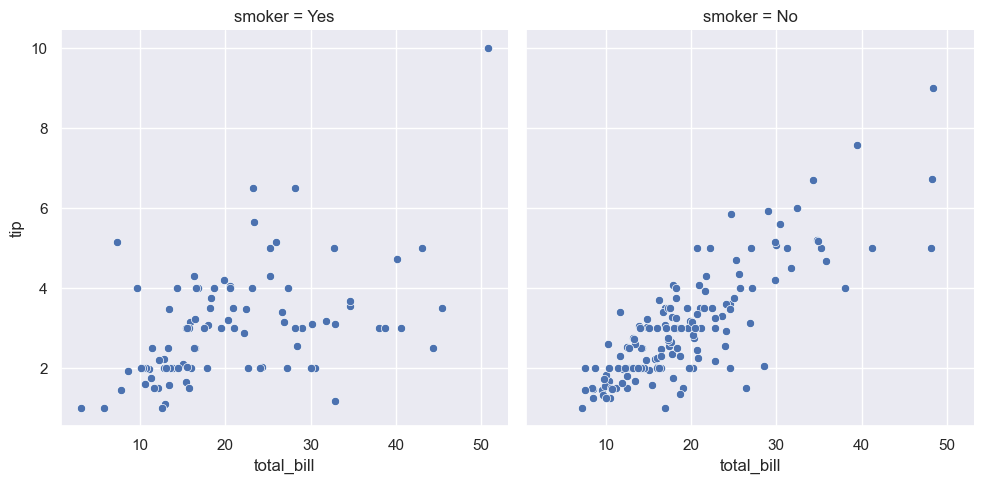

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip", col="smoker")
plt.show()

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:



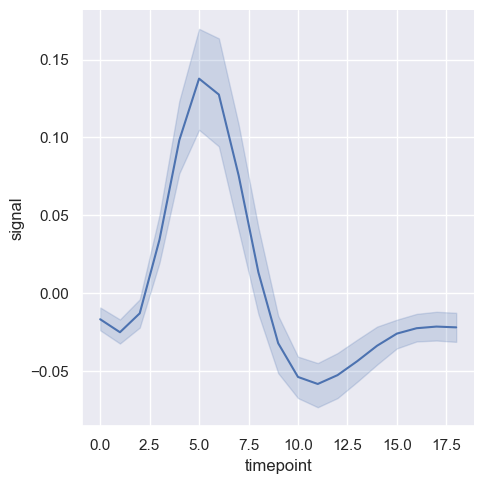

In [3]:
%matplotlib inline 

fmri = sns.load_dataset("fmri")
fmri.head()
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

### Heatmap 

Heatmaps visualise data through variations in colouring. Heatmaps are useful for cross-examining multivariate data, through placing variables in the rows and columns and colouring the cells within the table. Heatmaps are good for showing variance across multiple variables, revealing any patterns, displaying whether any variables are similar to each other, and for detecting if any correlations exist.

Let's see how we can generate a heatmap using Seaborn. We will learn how to choose an appropriate color palette for the given data. 

You are asked to visualize the surface temperature change for the Northern Hemisphere for past years. Data from the GISS Surface Temperature Analysis is used, which contains estimates of global surface temperature change (in degree Celsius) for every month. The dataset contains temperature anomalies for every month from 1880 to the present. Temperature anomalies indicate how much warmer or colder it is than normal. For the GISS analysis, normal means the average over the 30-year period 1951-1980.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [5]:
data = pd.read_csv('datasets/northern_surface_temperature.csv', index_col=['Year'])
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-0.34,-0.50,-0.23,-0.29,-0.05,-0.15,-0.17,-0.25,-0.22,-0.30,-0.42,-0.39
1881,-0.30,-0.21,-0.03,0.01,0.04,-0.32,0.09,-0.03,-0.25,-0.42,-0.35,-0.22
1882,0.28,0.23,0.03,-0.30,-0.24,-0.28,-0.26,-0.13,-0.23,-0.51,-0.31,-0.67
1883,-0.56,-0.64,-0.14,-0.29,-0.24,-0.10,-0.04,-0.21,-0.32,-0.15,-0.44,-0.14
1884,-0.16,-0.11,-0.63,-0.59,-0.36,-0.40,-0.44,-0.49,-0.44,-0.43,-0.55,-0.46


Since we want to visualize the temperature changes over the years, it makes sense to have the years on the x-axis, and the months on the y-axis.  We can do this easily by doing a transpose on the dataframe.

In [6]:
data = data.transpose()
data.head(10)

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,-0.34,-0.30,0.28,-0.56,-0.16,-0.99,-0.71,-1.05,-0.46,-0.25,...,0.83,0.81,0.61,0.67,0.86,0.97,1.19,1.55,1.39,1.14
Feb,-0.50,-0.21,0.23,-0.64,-0.11,-0.43,-0.80,-0.67,-0.57,0.33,...,0.70,0.94,0.57,0.59,0.79,0.71,1.18,1.93,1.50,1.23
Mar,-0.23,-0.03,0.03,-0.14,-0.63,-0.21,-0.69,-0.41,-0.60,0.00,...,0.60,1.10,0.88,0.72,0.81,1.20,1.32,1.91,1.51,1.18
Apr,-0.29,0.01,-0.30,-0.29,-0.59,-0.47,-0.34,-0.35,-0.18,0.18,...,0.70,1.13,0.85,1.07,0.68,1.08,1.03,1.49,1.20,0.97
May,-0.05,0.04,-0.24,-0.24,-0.36,-0.56,-0.30,-0.22,-0.13,-0.01,...,0.66,0.94,0.66,0.97,0.78,0.90,1.04,1.11,0.92,1.01
Jun,-0.15,-0.32,-0.28,-0.10,-0.40,-0.42,-0.34,-0.18,0.00,-0.05,...,0.68,0.85,0.76,0.94,0.77,0.81,1.05,1.12,0.93,0.86
Jul,-0.17,0.09,-0.26,-0.04,-0.44,-0.31,-0.11,-0.21,0.03,-0.06,...,0.68,0.89,0.73,0.85,0.70,0.76,0.92,1.04,0.96,0.90
Aug,-0.25,-0.03,-0.13,-0.21,-0.49,-0.37,-0.40,-0.51,-0.18,-0.18,...,0.72,0.87,0.71,0.76,0.73,0.89,1.01,1.11,1.01,0.86
Sep,-0.22,-0.25,-0.23,-0.32,-0.44,-0.36,-0.30,-0.18,-0.17,-0.28,...,0.85,0.71,0.74,0.86,0.70,0.83,1.16,1.22,1.00,0.96
Oct,-0.30,-0.42,-0.51,-0.15,-0.43,-0.33,-0.28,-0.46,0.00,-0.39,...,0.79,0.89,0.91,0.91,0.83,0.93,1.29,1.03,1.05,1.23


Let's create a custom-diverging palette that diverges to blue (240 degrees on the hue wheel) for low values and to red (15 degrees on the hue wheel) for high values. Set the saturation as s=99. Make sure that the `diverging_palette()` function returns a colormap by setting as_cmap=True:

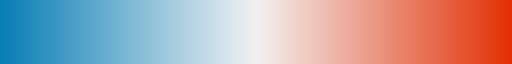

In [7]:
heat_colormap = sns.diverging_palette(240, 15, s=99, as_cmap=True)
heat_colormap

We will plot the heatmap for every 5 years. To ensure that the neutral color corresponds to no temperature change (the value is zero), set center=0:

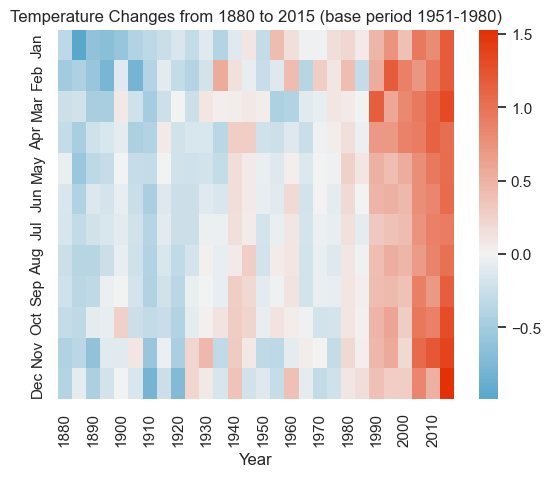

In [8]:
plt.figure()

sns.heatmap(data.iloc[:, ::5], cmap=heat_colormap, center=0)
plt.title("Temperature Changes from 1880 to 2015 (base period 1951-1980)")
plt.savefig('temperature_change.png', dpi=300, bbox_inches='tight')

### Exercise

In this activity, we will use a heatmap to find patterns in flight passenger data. The goal of this activity is to apply your knowledge about color palettes to choose a suitable color palette for this data.

1. Use pandas to read the flight_details.csv dataset located in the datasets folder. The given dataset contains the monthly figures for flight passengers for the years 1949 to 1960. 
2. Transform the data into a form suitable for display on heatmap.
2. Use a heatmap to visualize the given data.
3. Use your own appropriate colormap. Make sure that the lowest value is the brightest, and the highest the darkest, color. After executing the preceding steps, the expected output should be as follows:

<img src="images/heatmap_ex.png" width=60% />


    Years     Months  Passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
Years      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
Months                                                                        
April       129   135   163   181   235   227   269   313   348   348   396   
August      148   170   199   242   272   293   347   405   467   505 

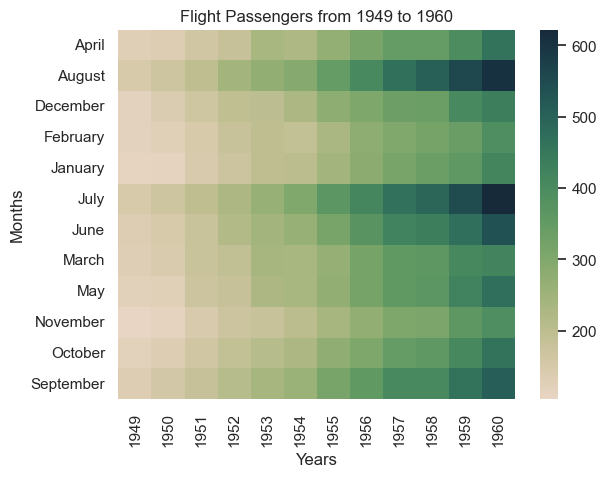

In [9]:
# Step 1: Import necessary packages and read the dataset using pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = pd.read_csv("datasets/flight_details.csv")
print(data.head(20))

# Step 2: Transform the data, so that years are on the x-axis and months are on the y-axis (wide-form data). 
data = data.pivot(index="Months", columns="Years", values="Passengers")
print(data.head(20))

# Step 3: Our index column (months) are currently not in sorted order, so you should re-order them.  One way is to use Dataframe.reindex(new_index)
# new_index = ['January', 'February', 'March', 'April', 'May', 'June',
#              'July', 'August', 'September', 'October', 'November', 'December']
# data = data.reindex(new_index)

## alternatively we can use a more generic method to sort the index using Dataframe.sort_index() 
# def remap(x):
#     months = ['January', 'February', 'March', 'April', 'May', 'June',
#                      'July', 'August', 'September', 'October', 'November', 'December']   
#     return [ months.index(e) for e in x ]
# data = data.sort_index(axis=0, ascending=True, key=remap)

# Step 4: Create an appropriate color map. Make sure that the lowest value is the brightest and the highest the darkest color.
color_map = sns.cubehelix_palette(rot=-0.7, as_cmap=True)

# Step 5: Create a heatmap with the chosen colormap and add appropriate title
plt.figure()
sns.heatmap(data, cmap=sns.cubehelix_palette(rot=-0.7, as_cmap=True)) # you can use any sequential color palette
plt.title("Flight Passengers from 1949 to 1960")
plt.show()


### Bar Plot 

Seaborn offers a very convenient way to create various bar plots. For example, creating bar plots with subgroups is quite easy in Seaborn.  Seaborn can represent estimates of central tendency with the height of each bar, while uncertainty is indicated by error bars at the top of the bar (default is 95% confidence interval).

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("datasets/salary.csv", index_col=0)
data.head(10)

,District,Salary,Age,English,Education,Gender
0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,Brooklyn,0.0,75,Very well,Academic degree,Female
5,Manhatten,225000.0,47,Very well,Academic degree,Male
6,Brooklyn,55000.0,37,Only language,Academic degree,Female
7,Brooklyn,50000.0,37,Only language,Academic degree,Male
8,Brooklyn,37000.0,34,Only language,Academic degree,Female
9,Brooklyn,65000.0,34,Only language,High school diploma,Male


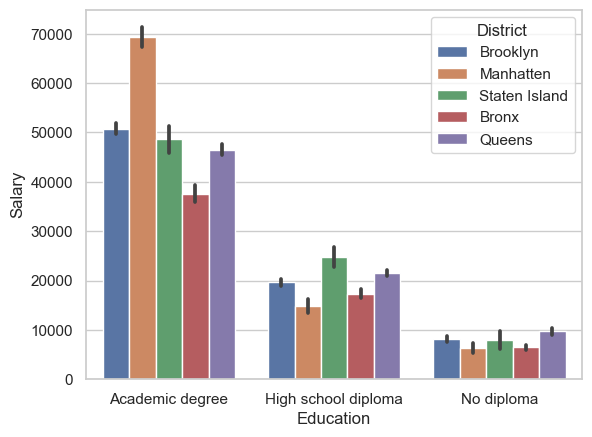

In [12]:
sns.set_theme(style="whitegrid")
plt.figure()
sns.barplot(x="Education", y="Salary", hue="District", data=data)
plt.show()

<Figure size 640x480 with 0 Axes>

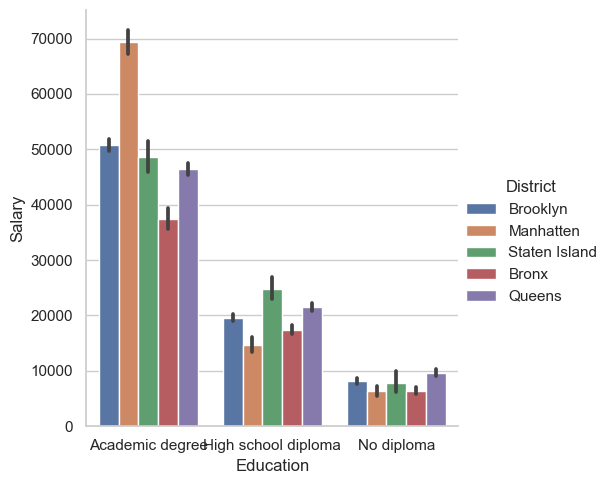

In [13]:
sns.set_theme(style="whitegrid")
plt.figure()
sns.catplot(x="Education", y="Salary", hue="District", kind='bar',data=data)
plt.show()

### Regression Plots

Regression is a technique in which we estimate the relationship between a dependent variable (mostly plotted along the Y – axis) and an independent variable (mostly plotted along the X – axis). Given a dataset, we can assign independent and dependent variables and then use various regression methods to find out the relation between these variables. Here, we will only cover linear regression; however, Seaborn provides a wider range of regression functionality if needed.

The `regplot()` function offered by Seaborn helps to visualize linear relationships, determined through linear regression. The following code snippet gives a simple example:

C:\Users\markk\miniconda3\envs\dlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


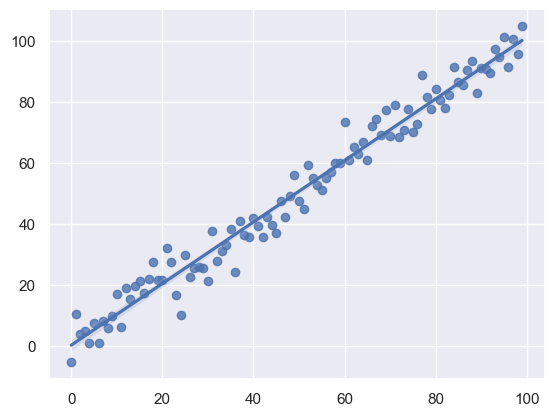

In [14]:
sns.set_theme()
x = np.arange(100)
y = x + np.random.normal(0, 5, size=100) # normal distribution with mean 0 and a standard deviation of 5
sns.regplot(x, y)
plt.show()

## Visualizing Distribution

### Kernel Density Estimation

It is often useful to visualize how variables of a dataset are distributed. Seaborn offers handy functions to examine univariate and bivariate distributions. One possible way to look at a univariate distribution in Seaborn is by using the displot() function. This will draw a histogram by default, and we can fit a kernel density estimate (KDE), by setting `kde` parameter to True, as illustrated in the following example:

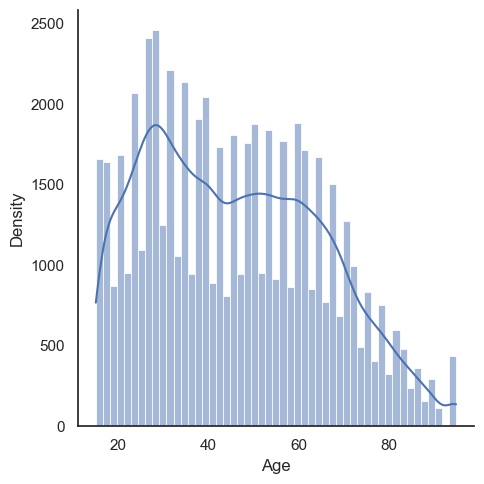

In [15]:
sns.set_style('white')
sns.displot(data.loc[:, 'Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

To just visualize the KDE, Seaborn provides the `kdeplot()` function. Compare to a histogram, KDE plot is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters. controlled by the bandwidth parameter `bw_adjust`.

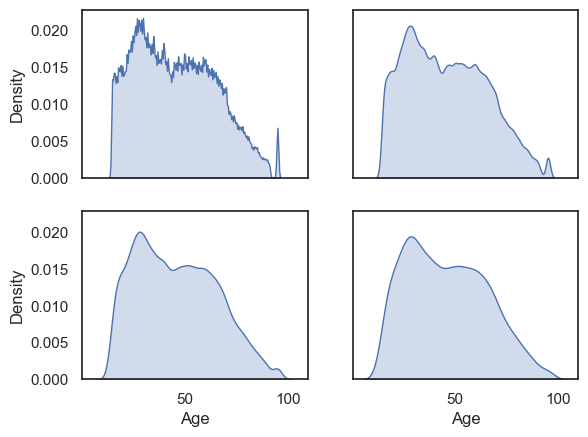

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
bw_params = [0.2, 0.5, 1.0, 1.5]

for i, ax in enumerate(axes.ravel()):
    sns.kdeplot(data.loc[:, 'Age'], shade=True, bw_adjust = bw_params[i], ax=ax)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Joint Plot

For visualizing bivariate distribution, we can use`jointplot()` function, which creates a multi-panel figure that shows both the joint relationship between both variables and the corresponding marginal distributions. A scatter plot shows each observation as points on the x and y axes. Additionally, a histogram for each variable is shown.

In [17]:
data = pd.read_csv('datasets/age_salary_hours.csv')

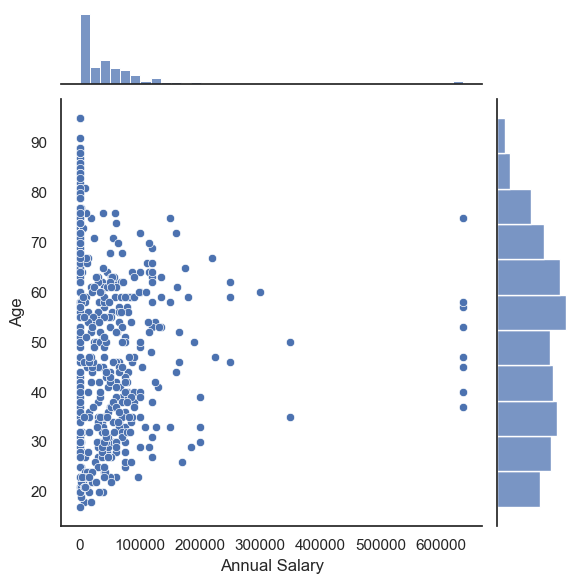

In [18]:
sns.set_theme(style="white")
sns.jointplot(x="Annual Salary", y="Age", data=data)
plt.show()

### Pairpolot

For visualizing multiple pairwise relationships in a dataset, Seaborn offers the`pairplot()` function. This function creates a matrix where off-diagonal elements visualize the relationship between each pair of variables and the diagonal elements show the marginal distributions.

A pair plot, also called a *correlogram*, is shown in the following diagram. Scatter plots are shown for all variable pairs on the off-diagonal, while KDEs are shown on the diagonal. Groups are highlighted by different colors:

In [19]:
data = pd.read_csv('datasets/age_salary_hours.csv')

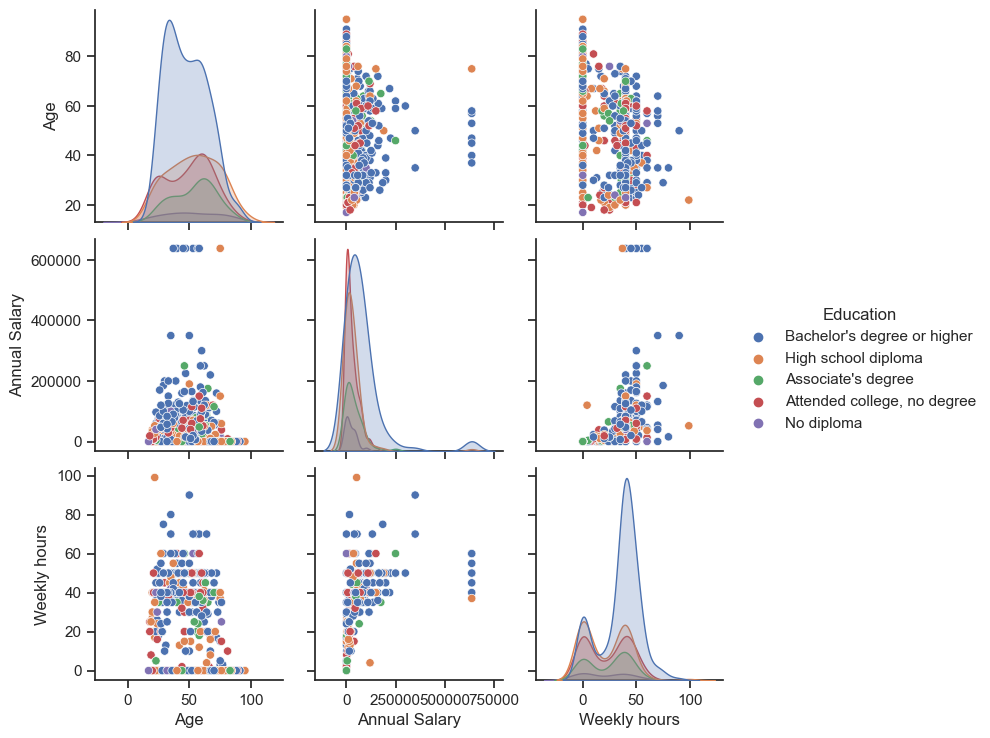

In [20]:
sns.set_theme(style="ticks", color_codes=True)
g = sns.pairplot(data, hue='Education')
plt.show()

### Violin Plots

A different approach to visualizing statistical measures is by using violin plots. They combine box plots with the kernel density estimation procedure that we described previously. It provides a richer description of the variable's distribution. Additionally, the quartile and whisker values from the box plot are shown inside the violin.

`seaborn.violinplot(data=None, *, x=None, y=None, hue=None, split, cut, ...)`

Important arguments: 

- `data`: Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form
- `x, y, hue`: names of variables in data, inputs for plotting long-form data
- `split`: When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.
- `cut`: Set to 0 to limit the violin range within the range of the observed data

In [21]:
data = pd.read_csv("datasets/salary.csv")
data.head(10)

,Unnamed: 0,District,Salary,Age,English,Education,Gender
0,0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,4,Brooklyn,0.0,75,Very well,Academic degree,Female
5,5,Manhatten,225000.0,47,Very well,Academic degree,Male
6,6,Brooklyn,55000.0,37,Only language,Academic degree,Female
7,7,Brooklyn,50000.0,37,Only language,Academic degree,Male
8,8,Brooklyn,37000.0,34,Only language,Academic degree,Female
9,9,Brooklyn,65000.0,34,Only language,High school diploma,Male


C:\Users\markk\miniconda3\envs\dlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


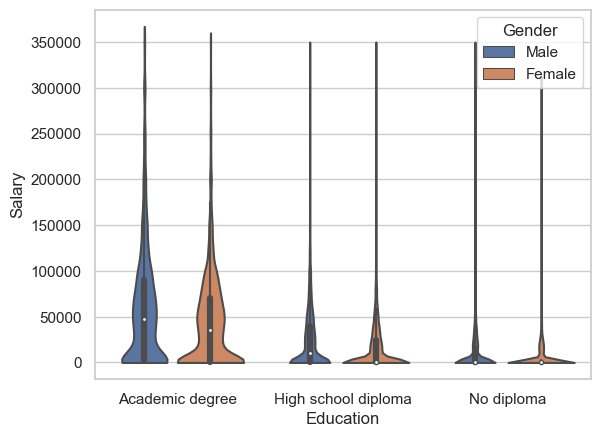

In [22]:
sns.set_theme(style="whitegrid")  
sns.violinplot('Education', 'Salary', hue='Gender', data=data, split=False, cut=0)
plt.show()

### Exercise 

In this exercise, we will compare the IQ scores among four different test groups by using the violin plot that's provided by the Seaborn library. The following steps will help you to complete this activity:

1. Use pandas to read the iq_scores.csv dataset located in the datasets folder.
2. Transform the data into appropriate form (e.g. long form), e.g. 

||Group|IQ Score|
|---|---|---|
|0|Group A|118|
|1|Group A|103|
|2|Group A|125|
|3|Group B|126|
|4|Group B|89|

3. Create a box plot for the IQ scores of the different test groups using Seaborn's violinplot function.
4. Use the whitegrid style, set the context to talk, and remove all axes spines, except the one on the bottom. Add a title to the plot.

After executing the preceding steps, the final output should appear as follows:

<img src="images/violin_plot_exercise.png" width=60% />

<details><summary>Click here for solution</summary>

```python

# Step 1: Import packages and read the CSV file 

data = pd.read_csv("datasets/iq_scores.csv")
data.head()

# Step 2: Rename the column names as "Group A", "Group B", and so on for readability.  Use Dataframe.rename() 

dict = {
    "group_a": "Group A",
    "group_b": "Group B",
    "group_c": "Group C",
    "group_d": "Group D"
}
data.rename(columns=dict, inplace=True)

# Step 3: Convert the data into long form, 

data_long = pd.melt(data, value_vars = ['Group A', 'Group B', 'Group C', 'Group D'], var_name = 'Group', value_name = 'IQ Score')

## Alternatively, we can do the following:
# group_a = data[data.columns[0]].tolist()
# group_b = data[data.columns[1]].tolist()
# group_c = data[data.columns[2]].tolist()
# group_d = data[data.columns[3]].tolist()

# data2 = pd.DataFrame({'Groups': ['Group A'] * len(group_a) + ['Group B'] * len(group_b) + ['Group C'] * len(group_c) + ['Group D'] * len(group_d),
#                      'IQ score': group_a + group_b + group_c + group_d})

# Step 4: Plot the violin plot 

sns.set_theme(style="whitegrid")
sns.set_context("talk")
sns.violinplot(data=data_long, x="Group", y="IQ Score")
sns.despine(left=True, right=True, top=True)
plt.title('IQ scores for different test groups')
plt.show()

```

</details>

## FacetGrid

The FacetGrid is useful for visualizing a certain plot for multiple variables separately. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have the obvious relationship with the rows and columns of an array. The hue is the third dimension and is shown in different colors. The FacetGrid class has to be initialized with a DataFrame, and the names of the variables that will form the row, column, or hue dimensions of the grid.

In [23]:
data = pd.read_csv("datasets/salary.csv")[:1000]
data.head()

,Unnamed: 0,District,Salary,Age,English,Education,Gender
0,0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,4,Brooklyn,0.0,75,Very well,Academic degree,Female


<Figure size 1200x600 with 0 Axes>

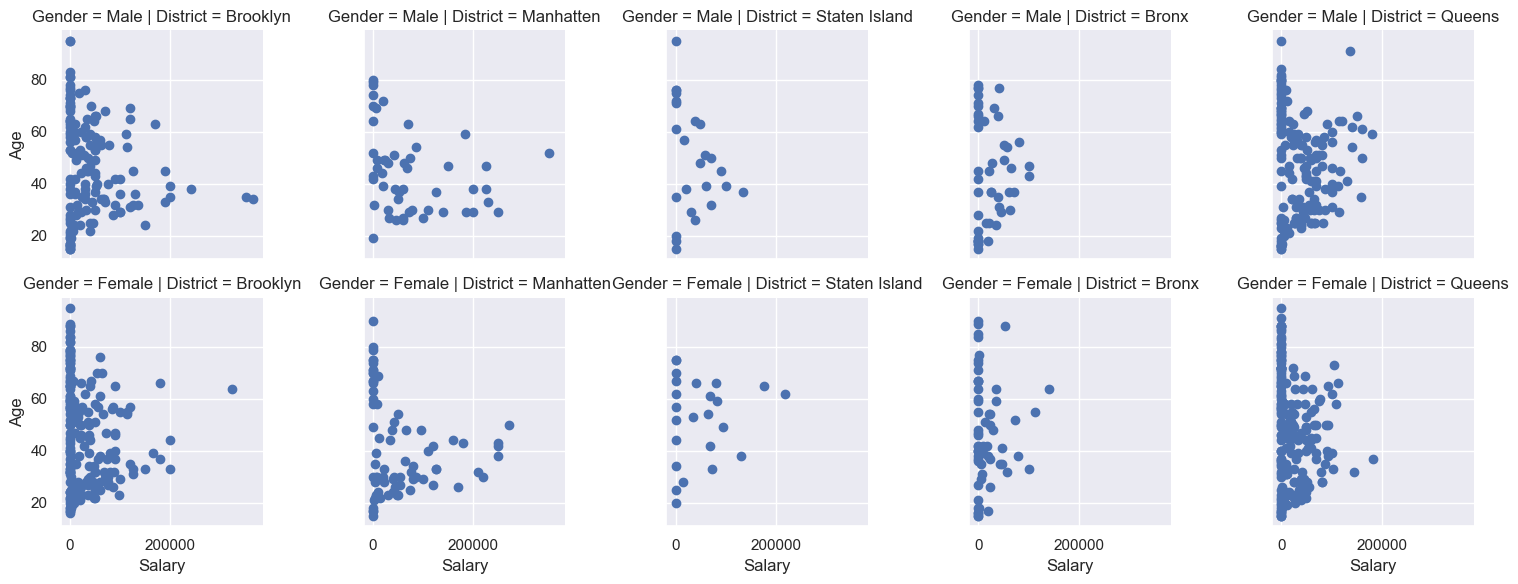

In [25]:
sns.set_theme()
plt.figure(figsize=(12, 6), constrained_layout=True)
data = pd.read_csv("datasets/salary.csv")[:1000]
g = sns.FacetGrid(data, col='District', row='Gender')
g.map(plt.scatter, 'Salary', 'Age')
plt.subplots_adjust(wspace=0.5)
plt.show()

### Exercise (Optional)

In this activity, we will generate a FacetGrid plot using the Seaborn library. We will visualize the total number of subscribers and the total number of views for the top 30 YouTube channels (as of January 2020) in the music category by using the `FacetGrid()` function.

Visualize the given data using a FacetGrid with two columns. The first column should show the number of subscribers for each YouTube channel, whereas the second column should show the number of views. The goal of this activity is to get some practice working with FacetGrids. The following are the steps to implement this activity:

1. Use pandas to read the `YouTube.csv` dataset located in the Datasets folder.
2. Convert the dataframe into appropriate long form format.
4. Create a FacetGrid with two columns to visualize the data.
5. After executing the preceding steps, the final output should appear as follows:

<img src="images/facetgrid_exercise.png" />

<details><summary>Click here for solution</summary>
    
```python
# Step 0:  Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the dataset YouTube.csv from datasets folder. 

data = pd.read_csv('datasets/YouTube.csv')

# Step 2: Convert to long form, with variable name 'Type' to indicate the type of values: 'Views' or 'Subcribers'. 

data.rename(columns={'Channel': 'YouTube Channel', 'Subs (in millions)': 'Subcribers', 'Views (in millions)': 'Views'}, inplace=True)
data_long = pd.melt(data, id_vars=['YouTube Channel'],  value_vars=['Subcribers', 'Views'], var_name='Type', value_name='Subs/Views (in millions)')

# Step 3: Create a FacetGrid with two columns (Type=Subscribers, Type=Views) with barplot

sns.set_theme()
g = sns.FacetGrid(data_long, col='Type', hue='Type', sharex=False, height=8)
g.map(sns.barplot, 'Subs/Views (in millions)', 'YouTube Channel')

plt.show()

```
    
</details>